# Proyecto intermedio
## Yalia Irais López  García
### Problema 3

In [9]:
using Plots

In [32]:
gr()

Plots.GRBackend()

In [33]:
n = 15000 #Número de iteraciones para n

x = [rand()* rand((-1,1)) for _ in 1:n]

y = [rand()* rand((-1,1)) for _ in 1:n]

circle = [x[i]^2 + y[i]^2 <= 1 for i in 1:n]

circle_sum = Int64[]

push!(circle_sum, circle[1])

for i in 1:(n-1)
    new_sum = circle_sum[i] + circle[i+1]
    push!(circle_sum, new_sum)
end

In [34]:
pi_est = [4* circle_sum[i]/i for i in 1:n]

15000-element Vector{Float64}:
 0.0
 2.0
 1.3333333333333333
 2.0
 1.6
 2.0
 2.2857142857142856
 2.5
 2.6666666666666665
 2.8
 2.909090909090909
 2.6666666666666665
 2.769230769230769
 ⋮
 3.1385682834078326
 3.1386257505003337
 3.1384163831632312
 3.1384738527214515
 3.1385313146134863
 3.1385887688408696
 3.138646215405135
 3.1387036543078155
 3.1387610855504433
 3.138818509134551
 3.138875925061671
 3.138933333333333

In [35]:
function circulo(h, k, r) #Para la grafica de puntos
    θ = LinRange(0, 2*π, 500) 
    0 .+ r*sin.(θ), k .+ r*cos.(θ)
end

plot(circle_shape(0, 0, 1), fillalpha=0.0, legend=false, aspect_ratio=1, linewidth=5, color=:red,title="Puntos")
scatter!(x, y, legend=false, linewidth=0.5, markersize=1, color=:blue )

Usaremos otro método para el ejercicio de aproximación de pi por método de Montecarlo

In [13]:
using Statistics

In [25]:
function estimaciondepi(nMC) #definir la funcion
           radius = 1.
           diameter = 2. * radius
           n_circle = zeros(Int,Threads.nthreads())
           Threads.@threads for i in 1:nMC
               x = (rand() - 0.5) * diameter
               y = (rand() - 0.5) * diameter
               r = sqrt(x^2 + y^2)
               if r <= radius
                   n_circle[Threads.threadid()] += 1
               end
           end
           return (sum(n_circle) / nMC) * 4.
       end

estimaciondepi (generic function with 1 method)

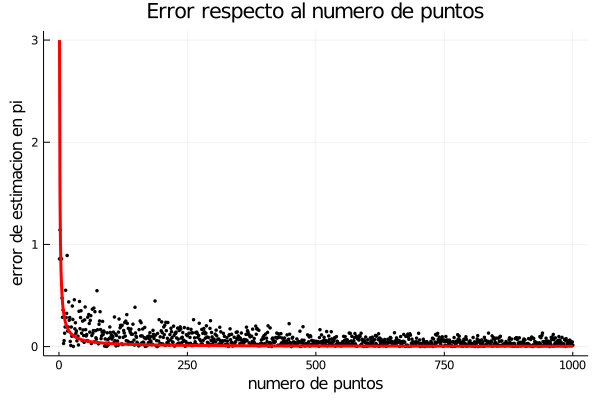

In [24]:
stan_err = []
num_puntos = [1:1000]

for i in 1:1000
    k = estimate_pi(i)
    error = abs(k .- π)
    push!(stan_err, error)
end

scatter(num_puntos, stan_err, legend=false, xlabel="numero de puntos", ylabel="error de estimacion en pi", 
    markersize=2, title="Error respecto al numero de puntos", color=:black)
x = 0:1:1000
f(x) = (3/x)
y = f.(x)
plot!(x, y, label="linea de tendencia", linewidth=3, color=:red)